In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import sys

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100

sys.path.append("../scripts")
from plot import get_price_duration

In [53]:
voll_files = {
    v: f"../../results/20240625-dispatchable/network_solved_LT-country+DE-voll+true-dispatchable+{v}.nc"
    for v in [10, 25, 50, 75]
}
ns_voll = {k: pypsa.Network(v) for k, v in voll_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-dispatchable+10.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-dispatchable+25.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-dispatchable+50.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true-dispatchable+75.nc has buses, carriers, generators, links, loads, stores


In [54]:
elas_files = {
    v: f"../../results/20240625-dispatchable/network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+{v}.nc"
    for v in [10, 25, 50, 75]
}
ns_elas = {k: pypsa.Network(v) for k, v in elas_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+10.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+25.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+50.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+75.nc has buses, carriers, generators, links, loads, stores


In [55]:
pdc_voll = {k: get_price_duration(v) for k, v in ns_voll.items()}
pdc_elas = {k: get_price_duration(v) for k, v in ns_elas.items()}

In [56]:
voll_st_files = {
    v: f"../../results/20240625-dispatchable/network_myopic_LT-country+DE-voll+true-dispatchable+{v}_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc"
    for v in [10, 25, 50, 75]
}
ns_voll_st = {k: pypsa.Network(v) for k, v in voll_st_files.items()}



INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-dispatchable+10_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-dispatchable+25_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-dispatchable+50_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true-dispatchable+75_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores


In [57]:
elas_st_files = {
    v: f"../../results/20240625-dispatchable/network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+{v}_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc"
    for v in [10, 25, 50, 75]
}
ns_elas_st = {k: pypsa.Network(v) for k, v in elas_st_files.items()}

INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+10_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+25_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+50_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic+true-elastic_intercept+2000-dispatchable+75_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores


In [58]:
pdc_voll_st = {k: get_price_duration(v) for k, v in ns_voll_st.items()}
pdc_elas_st = {k: get_price_duration(v) for k, v in ns_elas_st.items()}

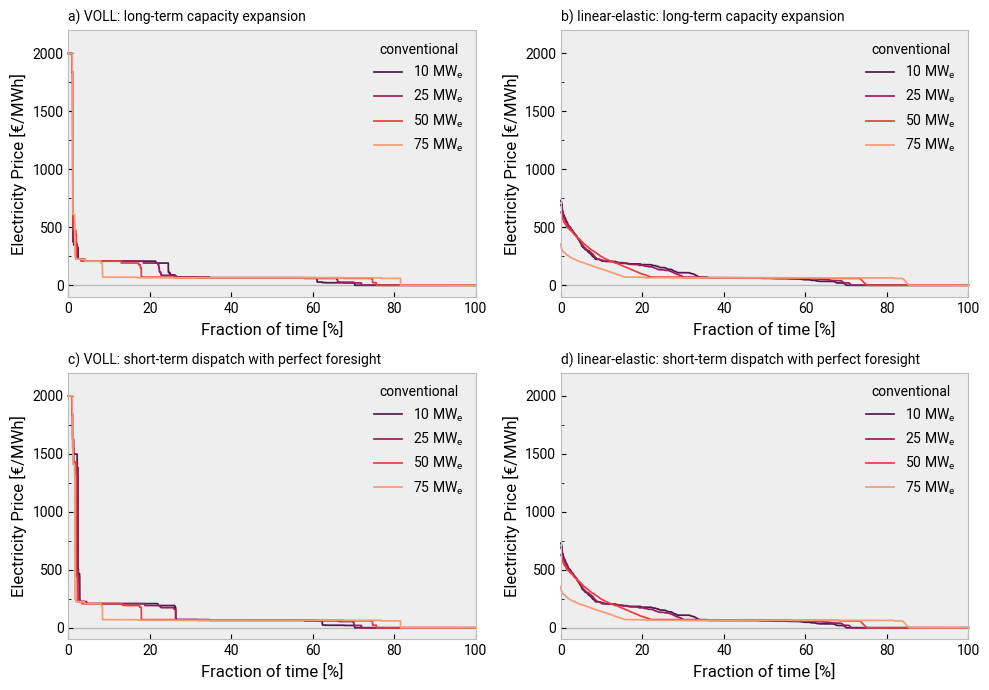

In [59]:
pu_colors = sns.color_palette("rocket", 4)
cat_colors = sns.color_palette("colorblind")
lw = 1.25

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

for i, (k, pdc) in enumerate(pdc_voll.items()):
    pdc.plot(ax=axs[0, 0], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_elas.items()):
    pdc.plot(ax=axs[0, 1], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_voll_st.items()):
    pdc.plot(ax=axs[1, 0], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

for i, (k, pdc) in enumerate(pdc_elas_st.items()):
    pdc.plot(ax=axs[1, 1], label=rf"{k} MW$_e$", color=pu_colors[i], clip_on=False, linewidth=lw)

axs[0, 0].set_title(
    "a) VOLL: long-term capacity expansion", loc="left", fontsize="medium"
)
axs[0, 1].set_title(
    "b) linear-elastic: long-term capacity expansion", loc="left", fontsize="medium"
)

axs[1, 0].set_title(
    "c) VOLL: short-term dispatch with perfect foresight", loc="left", fontsize="medium"
)
axs[1, 1].set_title(
    "d) linear-elastic: short-term dispatch with perfect foresight", loc="left", fontsize="medium"
)


for i in range(2):
    axs[0, i].set_ylim(-100, 2200)
    axs[0, i].set_ylabel("Electricity Price [€/MWh]")
    axs[0, i].set_yticks(range(0, 2001, 250), minor=True)

for i in range(2):
    axs[1, i].set_ylim(-100, 2200)
    axs[1, i].set_ylabel("Electricity Price [€/MWh]")
    axs[1, i].set_yticks(range(0, 2001, 250), minor=True)

for i in range(2):
    for j in range(2):
        axs[i, j].set_xlabel("Fraction of time [%]")
        axs[i, j].axhline(0, linewidth=1, color="#bbb", zorder=0)
        axs[i, j].set_xlim(0, 100)
        axs[i, j].legend(title='conventional')

for ext in ["png", "pdf"]:
    plt.savefig(f"../../figures/figure-dispatchable.{ext}", bbox_inches="tight", dpi=300)

In [60]:
ns_voll[25].generators.marginal_cost

Generator
load-shedding    2000.000000
solar               0.099998
wind                0.199997
dispatchable       64.683952
Name: marginal_cost, dtype: float64